In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [17]:
df['Heart Disease'] = df['Heart Disease'].map({
    'Presence': 1,
    'Absence': 0
})


In [18]:
categorical_cols = [
    'Chest pain type',
    'EKG results',
    'Slope of ST',
    'Thallium'
]

df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)


In [19]:
X_df = df_encoded.drop('Heart Disease', axis=1)
y = df_encoded['Heart Disease'].values.reshape(-1, 1)


In [20]:
X_df = X_df.apply(lambda col: pd.to_numeric(col, errors='coerce'))
X_df = X_df.fillna(0)


In [21]:
X = X_df.to_numpy(dtype=np.float64)


In [22]:
print(X.dtype)  # must be float64


float64


In [23]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

X = (X - X_mean) / (X_std + 1e-8)


In [24]:
m, n = X.shape
weights = np.zeros((n, 1))
bias = 0.0

learning_rate = 0.01
iterations = 1000


In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [26]:
def compute_cost(X, y, weights, bias):
    m = X.shape[0]
    z = np.dot(X, weights) + bias
    y_hat = sigmoid(z)

    cost = -(1/m) * np.sum(
        y * np.log(y_hat + 1e-9) +
        (1 - y) * np.log(1 - y_hat + 1e-9)
    )
    return cost


In [27]:
costs = []

for i in range(iterations):
    z = np.dot(X, weights) + bias
    y_hat = sigmoid(z)

    dw = (1/m) * np.dot(X.T, (y_hat - y))
    db = (1/m) * np.sum(y_hat - y)

    weights -= learning_rate * dw
    bias -= learning_rate * db

    cost = compute_cost(X, y, weights, bias)
    costs.append(cost)

    if i % 100 == 0:
        print(f"Iteration {i}, Cost: {cost:.4f}")


Iteration 0, Cost: 0.6889
Iteration 100, Cost: 0.4720
Iteration 200, Cost: 0.4079
Iteration 300, Cost: 0.3796
Iteration 400, Cost: 0.3639
Iteration 500, Cost: 0.3540
Iteration 600, Cost: 0.3472
Iteration 700, Cost: 0.3422
Iteration 800, Cost: 0.3384
Iteration 900, Cost: 0.3355


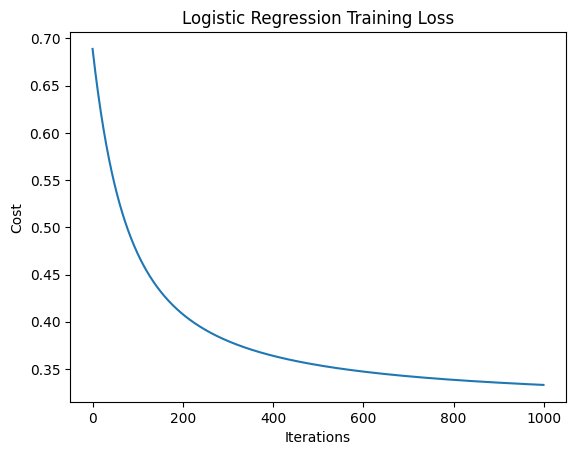

In [28]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Logistic Regression Training Loss")
plt.show()


In [29]:
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_hat = sigmoid(z)
    return (y_hat >= 0.5).astype(int)


In [30]:
y_pred = predict(X, weights, bias)
accuracy = np.mean(y_pred == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")


Training Accuracy: 85.19%
